In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
# https://blog.tensorflow.org/2019/02/introducing-tensorflow-datasets.html

In [3]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


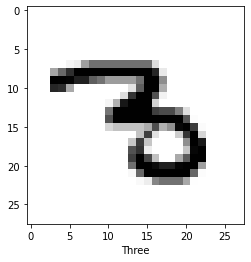

In [4]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
                'Five', 'Six', 'Seven', 'Eight', 'Nine']

IMG_INDEX = 30  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

In [5]:
## IMP pre-procesing

### train_images = train_images.reshape((60000, 28, 28, 1))
### test_images = test_images.reshape((10000, 28, 28, 1))

### train_images, test_images = train_images / 255.0, test_images / 255.0


In [12]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

x_labels=tf.keras.utils.to_categorical(train_labels)

print(train_images.shape)

(60000, 28, 28)


In [7]:
train_images=train_images / 255.0
test_images=test_images / 255.0

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
modelRNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.LSTM(128, return_sequences=True), ##LSTM - return sequences returns the last output in the output sequence rather than the full sequence
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(10) ##add output layer with 10 nodes for 10 classes
])
modelRNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_1 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 130,442
Trainable params: 130,442
Non-trainable params: 0
_________________________________________________________________


In [14]:
# saving weights to easily reset
weights_RNN=modelRNN.get_weights()
reset_model=lambda model,weights: model.set_weights(weights)

loss_fn=tf.keras.losses.CategoricalCrossentropy(from_logits=True)

modelRNN.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [15]:
reset_model(modelRNN,weights_RNN)

hist=modelRNN.fit(train_images,x_labels,epochs=5,validation_split=0.1,batch_size=256)

Epoch 1/5
211/211 [==============================] - 61s 242ms/step - loss: 0.7164 - accuracy: 0.7631 - val_loss: 0.2315 - val_accuracy: 0.9292
Epoch 2/5
211/211 [==============================] - 49s 231ms/step - loss: 0.1950 - accuracy: 0.9414 - val_loss: 0.1269 - val_accuracy: 0.9630
Epoch 3/5
211/211 [==============================] - 48s 227ms/step - loss: 0.1296 - accuracy: 0.9606 - val_loss: 0.1016 - val_accuracy: 0.9705
Epoch 4/5
211/211 [==============================] - 48s 226ms/step - loss: 0.0997 - accuracy: 0.9700 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 5/5
211/211 [==============================] - 48s 226ms/step - loss: 0.0802 - accuracy: 0.9762 - val_loss: 0.0774 - val_accuracy: 0.9772


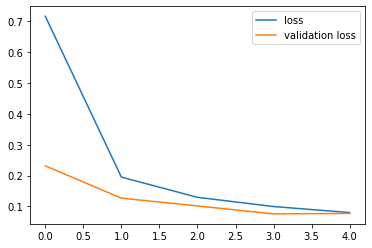

In [16]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

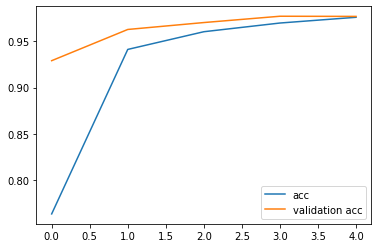

In [17]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()

In [18]:
# predicting

test_images=test_images / 255.0

test_images=np.array(test_images)
#test_images = test_images.reshape(test_images.shape[0], 28, 28)

test_images.shape

(10000, 28, 28)

In [19]:
y_pred=modelRNN.predict(test_images)

In [20]:
print("RNN raw predictions: ", y_pred[0:2])
print("")
print("y_pred.shape = ", y_pred.shape )

RNN raw predictions:  [[-0.18394881  1.4140674   0.08613596 -0.27081564  0.21095929 -0.375058
   0.1239244   0.3138317  -0.6379677  -0.6149373 ]
 [-0.18285322  1.4114732   0.10778553 -0.27164114  0.20976353 -0.3751927
   0.13105954  0.30035707 -0.6396093  -0.62195075]]

y_pred.shape =  (10000, 10)


In [21]:
pred_label = np.argmax(y_pred, axis=1)
print("")
print("label predictions: ", pred_label)


label predictions:  [1 1 1 ... 1 1 1]


**CNN**

In [63]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [64]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [54]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [66]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [27]:
train_images.shape

(60000, 28, 28)

In [67]:
hist1=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1422 - accuracy: 0.9560 - val_loss: 0.0436 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0398 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0302 - val_accuracy: 0.9898


In [68]:
model.save("digi_recog.h5")  # we can save the model and reload it at anytime in the future
#new_model = tf.keras.models.load_model('digi_recog.h5')

In [69]:
y_pred1=model.predict(test_images)
y_pred1

array([[6.7446608e-12, 5.8162675e-07, 2.1138183e-08, ..., 9.9998200e-01,
        1.2003306e-08, 1.2322335e-05],
       [2.7072236e-08, 1.1965126e-07, 9.9999988e-01, ..., 6.9333744e-10,
        6.4824673e-10, 4.1399877e-14],
       [2.9467850e-08, 9.9966800e-01, 4.7333973e-08, ..., 3.2884179e-04,
        1.1959894e-06, 1.4960472e-07],
       ...,
       [1.0758349e-15, 1.2396392e-08, 2.4860840e-12, ..., 4.7405166e-08,
        3.3600941e-08, 3.4502307e-08],
       [7.9592146e-09, 1.1248755e-10, 2.6223224e-10, ..., 5.0346298e-12,
        3.8225297e-04, 5.6498113e-08],
       [1.4381416e-07, 1.7804933e-08, 1.8088510e-06, ..., 1.5912580e-11,
        2.2800564e-06, 4.9963317e-10]], dtype=float32)

In [70]:
pred_label1 = np.argmax(y_pred1, axis=1)
print("")
print("label predictions: ", pred_label1)


label predictions:  [7 2 1 ... 4 5 6]


In [71]:
y_pred1.shape

(10000, 10)

In [72]:
con_m=tf.math.confusion_matrix(labels=test_labels,predictions=pred_label1).numpy()

In [73]:
# Normalization Confusion Matrix to the interpretation of which class is being misclassified.
import pandas as pd
con_m_norm=np.around(con_m.astype('float') / con_m.sum(axis=1)[:,np.newaxis],decimals=2)

con_m_norm

array([[0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]])

In [74]:
con_m_df=pd.DataFrame(con_m_norm,
                      index=classes,
                      columns=classes)

In [75]:
con_m_df

,0,1,2,3,4,5,6,7,8,9
0,0.98,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
1,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.01
5,0.00,0.00,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.01
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99


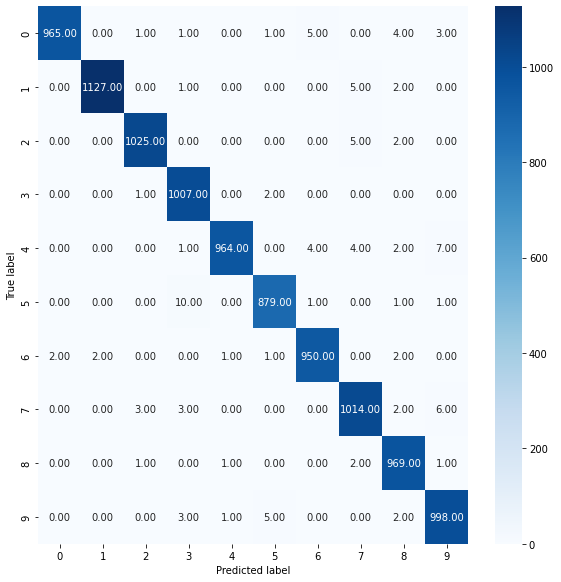

In [88]:
figure=plt.figure(figsize=(8,8))
conf_mx = tf.math.confusion_matrix(test_labels, pred_label1)
sns.heatmap(conf_mx,annot=True,fmt='.2f',cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

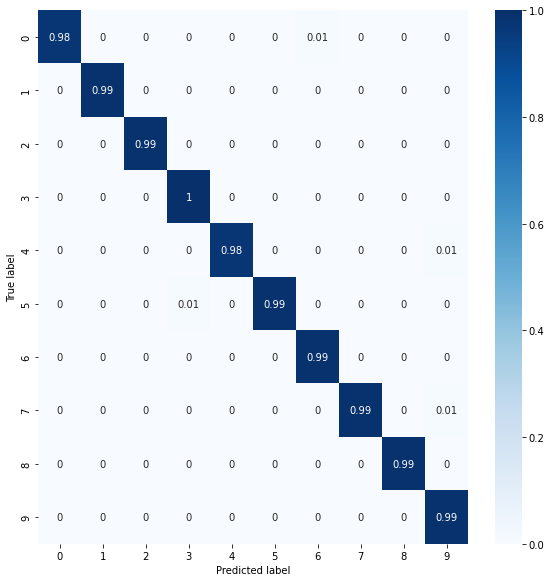

In [76]:
import seaborn as sns
figure=plt.figure(figsize=(8,8))
sns.heatmap(con_m_df,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

As we can see model is having trouble and is getting confused identifying '6,9'

---



In [77]:
row_sums = con_m.sum(axis=1, keepdims=True)
norm_conf_mx = con_m / row_sums

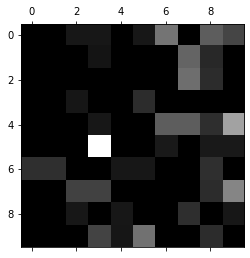

In [78]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

The columns '7' and '8' are quite bright which tells you that many images get misclassified as 7s or 8s. Similarly, the rows for classes 7 and 8 are
also quite bright, telling you that 7s and 8s are often confused with other digits 

The answer is [6] .


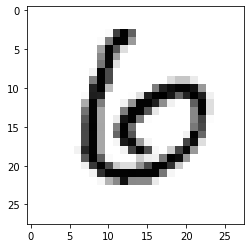

In [107]:
y_pred_sample= model.predict(test_images[[11]])
y_pred_sample=np.argmax(y_pred_sample,axis=1)
print("The answer is",y_pred_sample,".")
plt.imshow(test_images[[11]].reshape(28,28),cmap='Greys')